## Resource Estimation

### Model description
This notebook implements the same algorithmic implementation as the one of the $N=2$ harmonic oscillators extending our computations from $N=2$ to larger numbers of oscillators

$\underline{\textbf{Important comment}}$: Here, we fix all the masses to be equal to 1000 and all spring constants to be equal to 1 and we vary the number of oscillators N. We study two different connectivity topologies: 1) linear chain, i.e. each oscillator is connected with only two others (one on the left and on on the right) except the ones at the boundaries of the chain, 2) full connectivity where each oscillator is coupled to all the other $N-1$ oscillators.

In [82]:
import numpy as np

# The number N of oscillators needs to be a power of 2. Specify first the number of qubits n the system will correspond to.
n=2
N=2**n

# Create the mass matrix M as an N x N diagonal matrix with all diagonal elements equal to 1000
M = np.diag([10] * N)

# Create the spring constants matrix K as an N x N symmetric matrix with all elements equal to 1
#K = np.ones((N, N)) #This command is for full oscillators connectivity

#The following command is for oscillators in a linear chain arrangement
# Initialize the K matrix with zeros
K = np.zeros((N, N))

# Fill the K matrix according to the specified pattern
for i in range(N):
    if i > 0:
        K[i, i-1] = 1  # Element (i, i-1)
    K[i, i] = 1  # Element (i, i)
    if i < N-1:
        K[i, i+1] = 1  # Element (i, i+1)

# Compute the inverse square root of the mass matrix
inv_sqrt_M = np.diag(1 / np.sqrt(np.diag(M)))

# Sq_K matrix whose elements are the square root of the elements of the K matrix 
Sq_K = np.sqrt(K)

# F-matrix: Constructed using the spring constants
F = np.zeros((N, N))
for j in range(N):
    F[j, j] = np.sum(K[j, :])  # Diagonal elements
    for k in range(N):
        if j != k:
            F[j, k] = -K[j, k]  # Off-diagonal elements

#A-matrix
A = inv_sqrt_M @ F @ inv_sqrt_M

# Initialize the Q matrix (N x (N*(N+1)/2))
Q = np.zeros((N, N * (N + 1) // 2))

# Fill the Q matrix based on the formula
column = 0
for j in range(N):
    for k in range(j, N):
        if j == k:
            Q[j, column] = Sq_K[j, k]
        else:
            Q[j, column] = Sq_K[j, k]
            Q[k, column] = -Sq_K[j, k]
        column += 1

# Compute the B matrix
B = inv_sqrt_M @ Q

# Create the padded B matrix B_pad
B_pad = np.zeros((N**2, N**2))
B_pad[:N, :B.shape[1]] = B

# Construct the Hamiltonian H
size_H = N + N * (N + 1) // 2
H = np.zeros((size_H, size_H))
H[:N, N:] = B
H[N:, :N] = B.T

# Construct the padded Hamiltonian H_pad
size_H_pad = 2 * N**2
H_pad = np.zeros((size_H_pad, size_H_pad))
H_pad[:N**2, N**2:] = B_pad
H_pad[N**2:, :N**2] = B_pad.T

# Print the matrices
print("mass matrix: (M):")
print(M)
print("\n(Spring Constants Matrix) K:")
print(K)
print("\n Sq_K matrix:")
print(Sq_K)
print("\n F matrix:")
print(F)
print("\n A matrix:")
print(A)
print("\nQ Matrix:")
print(Q)
print("\nB Matrix:")
print(B)
print("\nPadded B Matrix (B_pad):")
print(B_pad)
print("\nHamiltonian (H):")
print(H)
print("\nPadded Hamiltonian (H_pad):")
print(H_pad)

mass matrix: (M):
[[10  0  0  0]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]

(Spring Constants Matrix) K:
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]

 Sq_K matrix:
[[1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]]

 F matrix:
[[ 2. -1. -0. -0.]
 [-1.  3. -1. -0.]
 [-0. -1.  3. -1.]
 [-0. -0. -1.  2.]]

 A matrix:
[[ 0.2 -0.1  0.   0. ]
 [-0.1  0.3 -0.1  0. ]
 [ 0.  -0.1  0.3 -0.1]
 [ 0.   0.  -0.1  0.2]]

Q Matrix:
[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0. -1.  0.  1.  1.  0.]
 [ 0.  0.  0. -0.  0.  0. -0.  0. -1.  1.]]

B Matrix:
[[ 0.31622777  0.31622777  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.31622777  0.          0.          0.31622777  0.31622777
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.31622777
   0.          0.31622777  0.31622777  0.        

### LCU Pauli Strings decomposition of the Hamiltonian matrix $\bar{\textbf{H}}$

In the notebook for the two oscillators, we discussed how to decompose a Hamiltonian matrix to the basis of the Pauli matrices together with the identity. For the case of $N=2$ oscillators, the padded Hamiltonian, performing the evolution, is $8\times 8$. For the general case of $N$ oscillators, the padded Hamiltonian is $2N^2\times 2N^2$, where $N=2^n$, i.e. is a power of 2. In other words, the padded Hamiltonian is a $(2^{2n+1})\times (2^{2n+1})$

$\textbf{Important clarification point}$: The padded Hamiltonian $\bar{\textbf{H}}$ has dimensionality $2N^2\times 2N^2$, where $N=2^n$, i.e. is a power of 2. In other words, the padded Hamiltonian is a $(2^{2n+1})\times (2^{2n+1})$. This is the dimensionality of a Hamiltonian acting on the Hilbert space of 3 qubits. For the case of the 2 oscillators, the Hamiltonian is equivalent to one acting on the space of 3 qubits. Hence, when the Hamiltonian is decomposed to a series of Pauli strings, we need strings made of 3 Pauli matrices.

Any hermitian operator acting on a Hilbert space $\mathcal{H}$ can be decomposed to a sum of the identity and Pauli matrices tensor products as

$\textbf{H}=\sum_{i_1=0}^3\sum_{i_2=0}^3,...,\sum_{i_{2n+1}=0}^3c_{i_1 i_2...i_{2n+1}}\,\textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}},$

where $\textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}}$ with $\textbf{P}_i=\left(\textbf{I}, \textbf{X}, \textbf{Y}, \textbf{Z}\right)$ forms a basis with an orthonormal product given by 


For the $N$-oscillators, resulting to the $2n+1$-qubits case, as we explained in the 2_oscilators notebook, the orthonormality reads

$
\langle \textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}}, \textbf{P}_{i_1^\prime}\otimes \textbf{P}_{i_2^\prime} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}^\prime} \rangle=\frac{1}{2^{2n+1}}\text{Tr}\left[\left(\textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}}\right)\left(\textbf{P}_{i_1^\prime}\otimes \textbf{P}_{i_2^\prime} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}^\prime}\right)\right]=\delta_{i_1 i_1^\prime}\delta_{i_2 i_2^\prime}\cdot \cdot \cdot\delta_{i_{2n+1} i_{2n+1}^\prime}.
$

The (padded) $2N^2\times N^2$ Hamiltonian of the $N$ oscillators that maps the evolution to that of a $2n+1$-qubit system is decomposed to the LCU Paili basis $(\textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}})$ with its expansion coefficients given by

$
c_{i_1 i_2...i_{2n+1}}=\frac{1}{2^{2n+1}}\text{Tr}\left[\left(\textbf{P}_{i_1}\otimes \textbf{P}_{i_2} \otimes \cdot \cdot \cdot \otimes \textbf{P}_{i_{2n+1}}\right)\textbf{H}\right].
$

The code below computes the $c_{i_1 i_2...i_{2n+1}}$ coefficients from which it constructs the LCU decomposition of the Hamiltonian.

In [83]:
import numpy as np
from itertools import product

# Number of qubits
k=2*(int(np.log2(N)))+1

# Define Pauli matrices and identity matrix
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

pauli_matrices = [I, X, Y, Z]
pauli_labels = ['I', 'X', 'Y', 'Z']

def generate_pauli_strings(k):
    """Generate all tensor products of k Pauli matrices"""
    pauli_strings = []
    labels = []
    for prods in product(range(4), repeat=k):
        ps = pauli_matrices[prods[0]]
        label = pauli_labels[prods[0]]
        for i in range(1, k):
            ps = np.kron(ps, pauli_matrices[prods[i]])
            label += pauli_labels[prods[i]]
        pauli_strings.append(ps)
        labels.append(label)
    return pauli_strings, labels

def decompose_hamiltonian(H):
    """Decompose Hamiltonian into Pauli strings"""
    w = H.shape[0]
    pauli_strings, labels = generate_pauli_strings(k)
    
    #coeffs = [np.trace(np.dot(ps, H)) / w for ps in pauli_strings]
    coeffs = [np.real(np.trace(np.dot(ps, H)) / w) for ps in pauli_strings]
    
    decomposition = {label: coef for label, coef in zip(labels, coeffs)}
    
    return decomposition, pauli_strings, coeffs

def reconstruct_hamiltonian(pauli_strings, coefficients):
    """Reconstruct Hamiltonian from Pauli strings and coefficients"""
    H_reconstructed = sum(c * ps for c, ps in zip(coefficients, pauli_strings))
    return H_reconstructed

# Decompose the Hamiltonian
decomposition, pauli_strings, coeffs = decompose_hamiltonian(H_pad)

# Print the decomposition
print("Decomposition of H_pad into Pauli strings:")
for label, coef in decomposition.items():
    if not np.isclose(coef, 0):
        print(f"{coef:.2f} * {label}")
print("------------------------------------------------------------------------------------------------------------------------------------------")

# Reconstruct the Hamiltonian
H_reconstructed = reconstruct_hamiltonian(pauli_strings, coeffs)

# Verification part
print("Verification")
print("\nOriginal Hamiltonian H_pad:")
print(H_pad)
print("\nReconstructed Hamiltonian H_reconstructed:")
print(H_reconstructed)
print("\nDifference (H_pad - H_reconstructed):")
print(H_pad - H_reconstructed)
print("\nReconstruction successful?:", np.allclose(H_pad, H_reconstructed))


Decomposition of H_pad into Pauli strings:
0.02 * XIIIX
0.04 * XIIIZ
0.02 * XIIZX
0.04 * XIIZZ
0.02 * XIXII
0.04 * XIXIX
-0.02 * XIXIZ
-0.02 * XIXXX
-0.02 * XIXYY
0.02 * XIXZI
-0.02 * XIXZZ
0.02 * XIYXY
-0.02 * XIYYX
0.04 * XIYZY
0.02 * XIZIX
0.04 * XIZIZ
0.02 * XIZZX
0.04 * XIZZZ
0.04 * XXIXI
-0.02 * XXIXX
0.02 * XXIYY
0.04 * XXZXI
-0.02 * XXZXX
0.02 * XXZYY
-0.02 * XYIXY
0.04 * XYIYI
-0.02 * XYIYX
-0.02 * XYZXY
0.04 * XYZYI
-0.02 * XYZYX
0.02 * XZIIX
0.04 * XZIIZ
0.02 * XZIZX
0.04 * XZIZZ
0.02 * XZXII
0.04 * XZXIX
-0.02 * XZXIZ
-0.02 * XZXXX
-0.02 * XZXYY
0.02 * XZXZI
-0.02 * XZXZZ
0.02 * XZYXY
-0.02 * XZYYX
0.04 * XZYZY
0.02 * XZZIX
0.04 * XZZIZ
0.02 * XZZZX
0.04 * XZZZZ
-0.02 * YIIIY
-0.02 * YIIZY
0.02 * YIXXY
-0.02 * YIXYX
0.04 * YIXZY
-0.02 * YIYII
-0.04 * YIYIX
0.02 * YIYIZ
0.02 * YIYXX
0.02 * YIYYY
-0.02 * YIYZI
0.02 * YIYZZ
-0.02 * YIZIY
-0.02 * YIZZY
-0.02 * YXIXY
0.04 * YXIYI
-0.02 * YXIYX
-0.02 * YXZXY
0.04 * YXZYI
-0.02 * YXZYX
-0.04 * YYIXI
0.02 * YYIXX
-0.02 * YYIYY
-0.0

In [84]:
coeffs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

### Block Encoding of the (padded) Hamiltonian matrix

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from classiq import *
from classiq.execution import (
    ClassiqBackendPreferences,
    ClassiqSimulatorBackendNames,
    ExecutionPreferences,
)
from classiq.qmod.symbolic import pi

def get_normalized_lcu_coef(lcu_coef):

    normalization_factor = sum(lcu_coef)
    prepare_prob = [c / normalization_factor for c in lcu_coef]
    coef_size = int(np.ceil(np.log2(len(prepare_prob))))
    prepare_prob += [0] * (2**coef_size - len(prepare_prob))

    print("The size of the block encoding:", coef_size)
    print("\n The normalized coefficients:", prepare_prob)
    print("\n The normalization factor:", normalization_factor)

    return normalization_factor, coef_size, prepare_prob

@qfunc
def apply_pauli_term(pauli_string: PauliTerm, x: QArray[QBit]):
    repeat(
        count=x.len,
        iteration=lambda index: switch(
            pauli_string.pauli[index],
            [
                lambda: IDENTITY(x[pauli_string.pauli.len - index - 1]),
                lambda: X(x[pauli_string.pauli.len - index - 1]),
                lambda: Y(x[pauli_string.pauli.len - index - 1]),
                lambda: Z(x[pauli_string.pauli.len - index - 1]),
            ],
        ),
    )


@qfunc
def lcu_paulis(
    pauli_terms_list: CArray[PauliTerm],
    probs: CArray[CReal],
    block: QNum,
    data: QArray[QBit],
):
    within_apply(
        lambda: inplace_prepare_state(probs, 0.0, block),
        lambda: repeat(
            count=pauli_terms_list.len,
            iteration=lambda i: control(
                block == i, lambda: apply_pauli_term(pauli_terms_list[i], data)
            ),
        ),
    )

## fix the execution preferences for this tutorial
Execution_Prefs = ExecutionPreferences(
    num_shots=1,
    backend_preferences=ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    ),
)

def get_projected_state_vector(
    execution_result,
    measured_var: str,
    projections: dict,
) -> np.ndarray:
    """
    This function returns a reduced statevector from execution results.
    measured var: the name of the reduced variable
    projections: on which values of the other variables to project, e.g., {"ind": 1}
    """
    projected_size = len(execution_result[0].value.output_qubits_map[measured_var])
    proj_statevector = np.zeros(2**projected_size).astype(complex)
    for sample in execution_result[0].value.parsed_state_vector:
        if all(sample.state[key] == projections[key] for key in projections.keys()):
            proj_statevector[int(sample.state[measured_var])] += sample.amplitude
    return proj_statevector

In [86]:
"""
Generating the HAMILTONIAN variable that is input to the function lcu_paulis() connecting our LCU decomposition 
to the next steps of block encoding
"""
HAMILTONIAN = [
    PauliTerm(pauli=[getattr(Pauli, label) for label in term], coefficient=coeff)
    for term, coeff in zip(decomposition.keys(), coeffs) if not np.isclose(coeff, 0)
]

In [87]:
"""
For the case of the two oscillators N=2, we also construct the HAMILTONIAN matrix manually to compare it with the automated construction 
of the previous cell and verify that the previous code is correct  
"""
HAMILTONIAN_manually = [
    PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.I], coefficient=0.25),
    PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.X], coefficient=0.50),
    PauliTerm(pauli=[Pauli.X, Pauli.I, Pauli.Z], coefficient=1.25),
    PauliTerm(pauli=[Pauli.X, Pauli.X, Pauli.X], coefficient=0.75),
    PauliTerm(pauli=[Pauli.X, Pauli.Y, Pauli.Y], coefficient=0.75),
    PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.I], coefficient=0.25),
    PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.X], coefficient=0.50),
    PauliTerm(pauli=[Pauli.X, Pauli.Z, Pauli.Z], coefficient=1.25),
    PauliTerm(pauli=[Pauli.Y, Pauli.I, Pauli.Y], coefficient=-0.50),
    PauliTerm(pauli=[Pauli.Y, Pauli.X, Pauli.Y], coefficient=0.75),
    PauliTerm(pauli=[Pauli.Y, Pauli.Y, Pauli.X], coefficient=-0.75),
    PauliTerm(pauli=[Pauli.Y, Pauli.Z, Pauli.Y], coefficient=-0.50)
]


"""
We store the coefficients of the expansion in lcu_pauli_coef to imput them in the get_normalized_lcu_coef() function and 
obtain the normalization factor, the normalized Hamiltonian, and its preparation probabilities.
"""
lcu_pauli_coef = [c.real for c in coeffs if c.real!=0]

normalization_factor = sum(np.abs(lcu_pauli_coef))
lcu_pauli_coef2=[]
lcu_pauli_coef2 = [abs(c) / normalization_factor for c in lcu_pauli_coef] 

normalization_ham, lcu_size_ham, prepare_probs_ham = get_normalized_lcu_coef(
    #lcu_pauli_coef
    np.abs(lcu_pauli_coef).tolist()
    #lcu_pauli_coef2
)

The size of the block encoding: 7

 The normalized coefficients: [0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.017857142857142887, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.008928571428571444, 0.00892857

In [88]:
HAMILTONIAN

[PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.X: 1>], coefficient=0.01976423537605237),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.Z: 3>], coefficient=0.03952847075210474),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.Z: 3>, <Pauli.X: 1>], coefficient=0.01976423537605237),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>, <Pauli.Z: 3>, <Pauli.Z: 3>], coefficient=0.03952847075210474),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>, <Pauli.I: 0>, <Pauli.I: 0>], coefficient=0.01976423537605237),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>], coefficient=0.03952847075210474),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>, <Pauli.I: 0>, <Pauli.Z: 3>], coefficient=-0.01976423537605237),
 PauliTerm(pauli=[<Pauli.X: 1>, <Pauli.I: 0>, <Pauli.X: 1>, <Pauli.X: 1>, <Pauli.X: 1>], coefficient=-0.01976423537605237),
 PauliTerm(pau

### State preparation

Now, we construct the initial state:

$
\ket{\psi_o}=
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\textbf{B}^\dagger\vec{y}(0)
\end{pmatrix}, \quad (22)
$

Note that the vector (22) is $(N+M)$-dimensional where $M=N*(N+1)/2$. We want to work with the power of 2 dimensions. This can be achieved by working with the padded $\bar{\textbf{B}}$ matrix. Then, the resulting initial quantum state where the initial positions and velocities are encoded is:

$
\ket{\psi_o}=
\begin{pmatrix}
\dot{\vec{y}}(0)\\
i\bar{\textbf{B}}^\dagger\vec{y}(0)
\end{pmatrix}, \quad (23)
$


In [89]:
y_o = np.random.uniform(-1, 1, N)

In [90]:
import numpy as np

""" 
Generate random N-dimensional lists ydot_o and y_o with elements between [-1, 1]
"""
ydot_o = np.random.uniform(-1, 1, N)


"""
Extend ydot_o and y_o to form ydot_pad_o and y_pad_o, respectively, with dimension N^2
"""
ydot_pad_o = np.pad(ydot_o, (0, N**2 - N), mode='constant', constant_values=0)
y_pad_o = np.pad(y_o, (0, N**2 - N), mode='constant', constant_values=0)

"""
Calculate jB_pad^\dagger y_pad_o (with j = 1j representing the imaginary unit)
"""
B_pad_dagger_y_pad_o = 1j * np.dot(B_pad.conj().T, y_pad_o)

"""
Construct the column vector psi_pad_o
"""
psi_pad_o = np.concatenate((ydot_pad_o, B_pad_dagger_y_pad_o))

"""
Store the real part of psi_pad_o to the variable amps
"""
#amps = np.real(psi_pad_o)
amps = np.concatenate((np.real(psi_pad_o[:N**2]), np.imag(psi_pad_o[N**2:])))
norm=np.linalg.norm(amps)
amps = amps/np.linalg.norm(amps)

"""
Define the matrix U_matrix
"""
identity = np.eye(N**2)
identity_j = 1j * np.eye(N**2)
U_matrix = np.block([
    [identity, np.zeros((N**2, N**2))],
    [np.zeros((N**2, N**2)), identity_j]
])

"""
Print the results
"""
print("ydot_pad_o:")
print(ydot_pad_o)
print("\ny_pad_o:")
print(y_pad_o)
print("\npsi_pad_o:")
print(psi_pad_o)
print("\nInitial amplitudes without imaginary phase (amps):")
print(amps)
print("\nU_matrix:")
print(U_matrix)

ydot_pad_o:
[ 0.26337779 -0.99247002 -0.85116795  0.89650583  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]

y_pad_o:
[ 0.92008925  0.68211594  0.26250163 -0.58086278  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]

psi_pad_o:
[ 0.26337779+0.j         -0.99247002+0.j         -0.85116795+0.j
  0.89650583+0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.29095777j  0.        +0.07525377j
  0.        +0.j          0.        +0.j          0.        +0.215704j
  0.        +0.1326937j   0.        +0.j          0.        +0.08301031j
  0.        +0.26669525j -0.        -0.18368494j  0.        +0.j

In [91]:
amps

array([ 0.15604475, -0.58801367, -0.50429573,  0.53115729,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.1723852 ,  0.04458598,  0.        ,  0.        ,
        0.12779923,  0.0786177 ,  0.        ,  0.04918153,  0.15801026,
       -0.10882873,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [92]:
"""
Finally, we are ready to define the function that creates and prepares the initial state in the actual quantum algorithm in the qmod environment.
"""
@qfunc
def my_state_prep(x: Output[QArray[QBit]]):
    prepare_amplitudes(amplitudes=amps.tolist(), bound=0.01, out=x)
    unitary(U_matrix.tolist(), x)

In [93]:
from classiq.execution import IBMBackendPreferences

In [100]:
from classiq.execution import (
    IBMBackendPreferences,
    IBMBackendProvider,
)

ibm_provider = IBMBackendProvider(
    hub="ibm-q", group="open", Project="main"
)
preferences = IBMBackendPreferences(
    backend_name="ibm_osaka",
    """
    Uncomment and provide your IBM access token in the following line
    """
    #access_token="",
    provider=ibm_provider,
)

In [101]:
@qfunc
def main(data: Output[QNum], block: Output[QNum]):
    allocate(lcu_size_ham, block)
    my_state_prep(data)
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)
    #lcu_paulis(HAMILTONIAN, np.abs(prepare_probs_ham).tolist(), block, data)

qmod = create_model(main, execution_preferences=preferences)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/dc2714ac-f62a-4c06-885d-3559f662a4c8?version=0.44.0


In [96]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 34945


In [99]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 31756


In [102]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 34779


C:\Users\HAEMANTH\AppData\Local\Temp\ipykernel_8188\2339098541.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


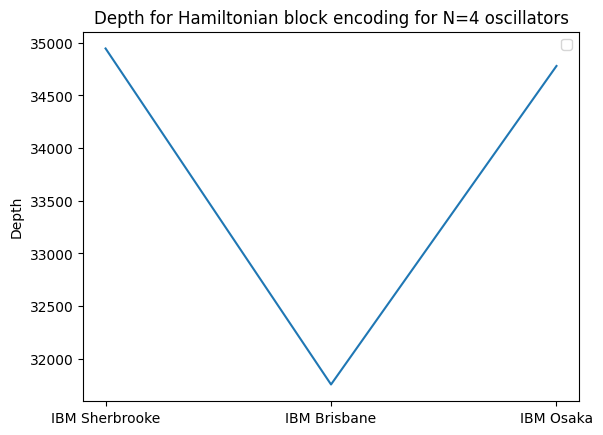

In [105]:
import matplotlib.pyplot as plt
plt.plot(range(3),[34945,31756,34779])
plt.xticks(range(3), ["IBM Sherbrooke", "IBM Brisbane", "IBM Osaka"])
plt.legend()
plt.ylabel("Depth")
plt.title("Depth for Hamiltonian block encoding for N=4 oscillators")
plt.show()

Velocities = 1

In [41]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 32159


Velocities = 10

In [46]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 33814


Velocities = 100

In [51]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 33406


Widths, depths vs N (number of oscillators)

N = 2

In [14]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 9 and the circuit_depth is 1652


N = 4

In [67]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 35818


N = 8

In [66]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit_depth is {circuit_depth}")

The circuit width is 16 and the circuit_depth is 35818


N = 16

N = 32

In [ ]:
state_result = get_projected_state_vector(res, "data", {"block": 0.0})

In [ ]:
PAULI_MATRICES_DICT = {
    Pauli.I: np.array([[1, 0], [0, 1]], dtype=np.complex128),
    Pauli.Z: np.array([[1, 0], [0, -1]], dtype=np.complex128),
    Pauli.X: np.array([[0, 1], [1, 0]], dtype=np.complex128),
    Pauli.Y: np.array([[0, -1j], [1j, 0]], dtype=np.complex128),
}


def pauli_list_to_mat(pauli_list: list) -> np.ndarray:
    real_matrix = 0
    for term in pauli_list:
        single_str = PAULI_MATRICES_DICT[term.pauli[0]]
        for pauli in term.pauli[1:]:
            single_str = np.kron(single_str, PAULI_MATRICES_DICT[pauli])
        real_matrix += term.coefficient * single_str

    assert np.allclose(
        np.transpose(np.conjugate(real_matrix)), real_matrix
    ), "matrix not Hermitian"
    assert np.allclose(np.imag(real_matrix), 0.0), "matrix is not real-valued"
    return np.real(real_matrix)

In [ ]:
matrix = pauli_list_to_mat(HAMILTONIAN)

In [ ]:
normalization_ham

In [ ]:
matrix

In [ ]:
expected_state = (matrix /  normalization_ham) @ (U_matrix @ amps)
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(1j * relative_phase)

In [ ]:
print("The resulting state:", state_result)
print("The expected state:", expected_state)
assert (np.allclose(state_result, expected_state) < 1e-16)

#### Success!!!

In [ ]:
EVOLUTION_TIME = 10
EPS = 0.1    # Precision

In [ ]:
@qfunc
def my_walk_operator(block: QArray[QBit], data: QArray[QBit]) -> None:
    lcu_paulis(HAMILTONIAN, prepare_probs_ham, block, data)  # Unitary implementing H
    reflect_about_zero(block) # Π_|0>M operator
    RY(2 * pi, block[0])      # for the negative sign found in the unitary construction of W

In [ ]:
from scipy.special import eval_chebyt, jv

def get_cheb_coef(epsilon, t):
    poly_degree = int(
        np.ceil(
            t
            + np.log(epsilon ** (-1)) / np.log(np.exp(1) + np.log(epsilon ** (-1)) / t)
        )
    )
    cos_coef = [jv(0, t)] + [
        2 * jv(2 * k, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    sin_coef = [
        -2 * jv(2 * k - 1, t) * (-1) ** k for k in range(1, poly_degree // 2 + 1)
    ]
    return cos_coef, sin_coef

In [ ]:
normalized_time = normalization_ham * EVOLUTION_TIME   # because block encoding for H stores H/alpha_bar (normalization constant)

cos_coef, sin_coef = get_cheb_coef(EPS, normalized_time)

combined_sin_cos_coef = []
for k in range(len(cos_coef) - 1):
    combined_sin_cos_coef.append(cos_coef[k])
    combined_sin_cos_coef.append(sin_coef[k])
combined_sin_cos_coef.append(cos_coef[-1])
if len(sin_coef) == len(cos_coef):
    combined_sin_cos_coef.append(sin_coef[-1])

In [ ]:
signs_cheb_coef = np.sign(combined_sin_cos_coef).tolist()
generalized_signs = [
    (1 - signs_cheb_coef[s]) + (s) % 2 for s in range(len(signs_cheb_coef))
]
positive_cheb_lcu_coef = np.abs(combined_sin_cos_coef)

In [ ]:
normalization_exp, lcu_size_exp, prepare_probs_exp = get_normalized_lcu_coef(
    positive_cheb_lcu_coef
)

In [ ]:
@qfunc
def lcu_cheb(
    coef: CArray[CReal],
    generalized_signs: CArray[CInt],
    walk_operator: QCallable[QNum, QArray],
    walk_block: QNum,
    walk_data: QArray,
    cheb_block: QNum,
):

    within_apply(
        lambda: inplace_prepare_state(coef, 0.0, cheb_block),
        lambda: repeat(
            generalized_signs.len,
            lambda k: control(
                cheb_block == k,
                lambda: (
                    U(0, 0, 0, pi / 2 * generalized_signs[k], walk_data[0]),
                    power(k, lambda: walk_operator(walk_block, walk_data)),
                ),
            ),
        ),
    )

In [ ]:
@qfunc
def main(ham_block: Output[QNum], data: Output[QNum], exp_block: Output[QNum]):
    allocate(lcu_size_exp, exp_block)
    allocate(lcu_size_ham, ham_block)
    my_state_prep(data)  # Initial state prep block
    lcu_cheb(
        prepare_probs_exp,
        generalized_signs,
        lambda x, y: my_walk_operator(x, y),
        ham_block,
        data,
        exp_block,
    )


#qmod = create_model(main, execution_preferences=Execution_Prefs)
#write_qmod(qmod, f'hamiltonian_simulation_qubitization_{N}_oscillators', decimal_precision=12)
#qprog = synthesize(qmod)
#show(qprog)

qmod_with_constraints = set_constraints(
    qmod, Constraints(optimization_parameter="depth", max_width=100)
)

qprog = synthesize(qmod_with_constraints)
show(qprog)

In [ ]:
results = execute(qprog).result()

In [ ]:
state_result = get_projected_state_vector(
    results, "data", {"exp_block": 0.0, "ham_block": 0.0}
)

In [ ]:
expected_state = (
    1 / normalization_exp * scipy.linalg.expm(1j * matrix * EVOLUTION_TIME) @ (U_matrix @ amps)
)
relative_phase = np.angle(expected_state[0] / state_result[0])
state_result = state_result * np.exp(
    1j * relative_phase
)  # rotate according to a global phase
print("expected state:", expected_state)
print("resulting state:", state_result)
#assert np.linalg.norm(state_result - expected_state) < EPS

In [ ]:
print(
    "overlap between expected and resulting state:",
    np.abs(np.vdot(state_result, expected_state))
    * normalization_exp
    / np.linalg.norm(state_result),
)